**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Reading datset csv file**

In [5]:
df = pd.read_csv("shrink_ray_dataset.csv")
df.shape

(200, 2)

In [6]:
df.head()

,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00


In [7]:
df.describe()

,Power,Shrinkage
count,200.000000,200.000000
mean,150.000000,45.274700
std,87.254773,28.252884
min,0.000000,0.000000
25%,75.002500,20.435000
50%,150.000000,43.855000
75%,224.997500,70.595000
max,300.000000,94.920000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Power       200 non-null    float64
 1    Shrinkage  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


c:\Users\Legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Shrinkage percentage distribution')

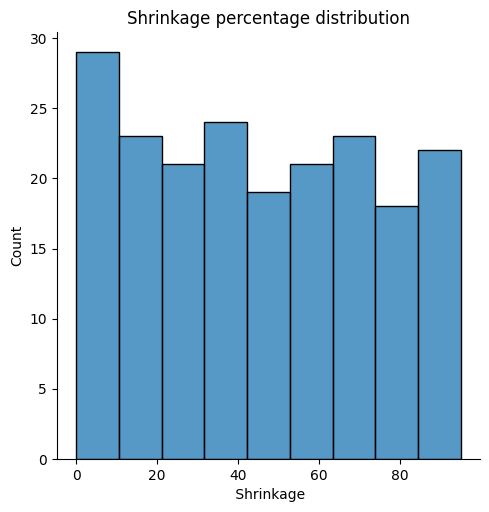

In [9]:
plt.rcParams['figure.figsize'] = (10,10)
sns.displot(df[' Shrinkage'])
plt.title('Shrinkage percentage distribution')

**Scatter plot of Dataset**

c:\Users\Legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


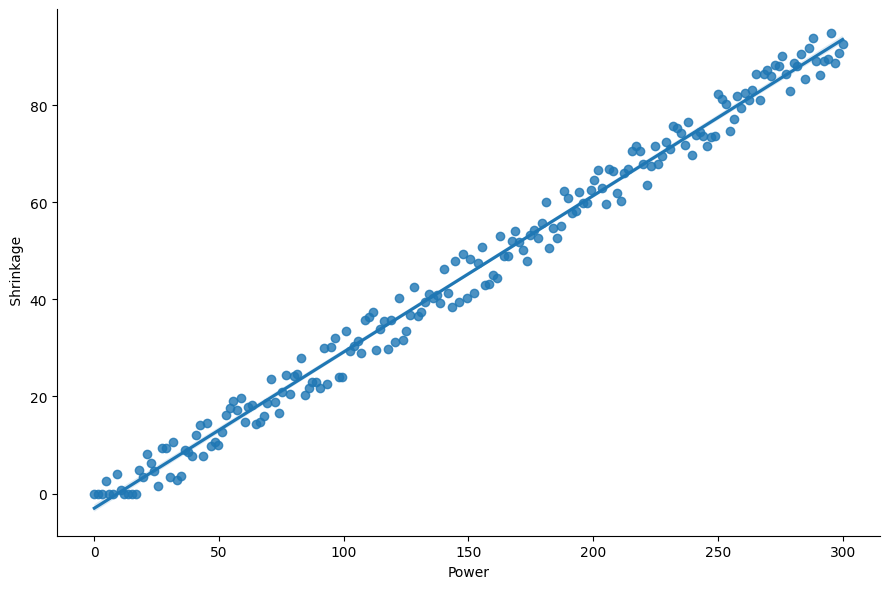

In [10]:
sns.lmplot(x ='Power', y =' Shrinkage', data = df,height = 6,aspect = 1.5)
plt.show()

**Splitting column 1 (power) and column 2 (shrinkage)**

In [11]:
x = np.array(df['Power']).reshape(-1,1)
y = np.array(df[' Shrinkage']).reshape(-1,1)
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


**Splitting 80% of dataset into train and 20% to test**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


**Training with Linear Regression and the estimated accuracy**

In [14]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_test,y_test))

0.9911979433157821


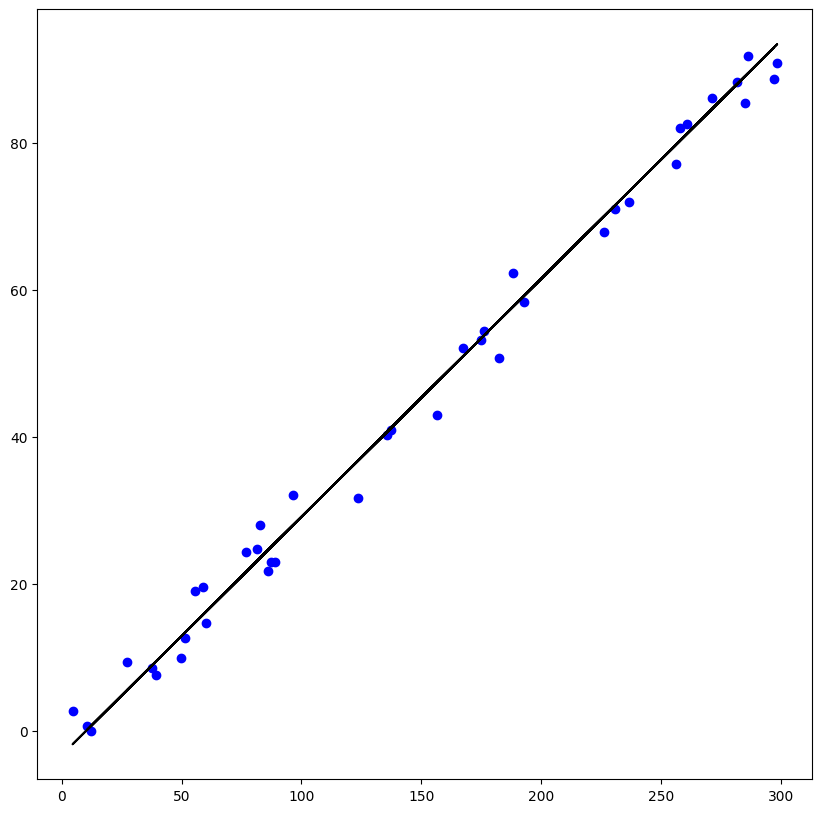

In [15]:
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values

**Training on shrinkage precentage and predicting the power**

In [16]:
regr_reversed = LinearRegression()
regr_reversed.fit(y_train,x_train)
print(regr_reversed.score(y_test,x_test))
#Training Accuracy

0.9910602079407956


**The value of power at which shrinkage will be 85%**

In [17]:
predict_at_85_percent = regr_reversed.predict([[85]])
print(predict_at_85_percent)

[[271.19918677]]
